In [1]:
using Printf
using Random
using LinearAlgebra
rng = MersenneTwister(18);

In [2]:
include("../src/gees.jl")

gees_testsuite (generic function with 1 method)

In [3]:
n = 4
Λ = diagm(0 => Float32[2.0^(-i) for i=0:n-3])
A = zeros(n,n)
A[1:n-2,1:n-2] = Λ
A[n-1:n,n-1:n] = [0 1; -1 0]
X = rand(rng, n, n)

# Λ = diagm(Float32[2.0^(-i) for i=0:n-1])
# A = Λ
# X, = qr(rand(rng, n, n))

A = X * A / X

println("Matrix A")
pretty_print(A)
Λ = eigenvalue_sorted(A)

Matrix A
 -5.4e-01  1.9e+00  3.5e+00 -3.8e+00
 -1.2e+00  2.7e+00  4.4e+00 -4.8e+00
 -1.4e+00  2.5e+00  5.8e+00 -6.1e+00
 -1.6e+00  2.6e+00  6.4e+00 -6.4e+00


4-element Array{Complex{Float64},1}:
     0.5000000000000014 + 0.0im
 -2.254489997466358e-15 - 0.9999999999999979im
 -2.254489997466358e-15 + 0.9999999999999979im
     1.0000000000000002 + 0.0im

In [4]:
# Applying Householder reflections to make matrix A upper Hessenberg
gehrd!(A)
A0 = copy(A)

4×4 Array{Float64,2}:
 -0.539952  -0.357157  -0.092044  -5.49345
  2.47328    0.960772   1.00985   14.52
  0.0       -0.177055   0.608983   0.640705
  0.0        0.0       -0.337349   0.470196

In [5]:
# Checking that A is upper Hessenberg now
println("Norm for lower part of matrix = ",norm(tril(A,-2)))
println("Matrix A")
A

Norm for lower part of matrix = 0.0
Matrix A


4×4 Array{Float64,2}:
 -0.539952  -0.357157  -0.092044  -5.49345
  2.47328    0.960772   1.00985   14.52
  0.0       -0.177055   0.608983   0.640705
  0.0        0.0       -0.337349   0.470196

In [6]:
# Checking that the eigenvalues are the same
D = eigenvalue_sorted(A)
println(norm(D-Λ))

6.5876948602543385e-15


In [7]:
# Sequential version of QR iteration using Givens rotations
givens_QR_iteration_s!(A)
A

4×4 Array{Float64,2}:
  0.451537   2.47787   12.6387     8.84444
 -0.222977   0.397203  -0.96249   -0.312148
  0.0       -0.343572  -0.614769  -0.889788
  0.0        0.0        1.48843    1.26603

In [8]:
# Testing the result
D = eigenvalue_sorted(A)
@show norm(tril(A,-2))
@show norm(D-Λ)

norm(tril(A, -2)) = 0.0
norm(D - Λ) = 8.591904876735825e-15


8.591904876735825e-15

In [9]:
# QR iteration with bulge chasing
A = copy(A0)
givens_QR_iteration!(A)
A

4×4 Array{Float64,2}:
  0.451537      2.47787   12.6387     8.84444
 -0.222977      0.397203  -0.96249   -0.312148
 -1.38778e-17  -0.343572  -0.614769  -0.889788
  0.0           0.0        1.48843    1.26603

In [10]:
# Testing the result
D = eigenvalue_sorted(A)
@show norm(tril(A,-2))
@show norm(D-Λ)

norm(tril(A, -2)) = 1.3877787807814457e-17
norm(D - Λ) = 7.421766257945797e-15


7.421766257945797e-15

In [11]:
# Single step of QR iteration with double real shift
A = copy(A0)
gees_single_step!(A, false) # false: exceptional_shift is not applied
A

4×4 Array{Float64,2}:
  0.468597     -9.28401      11.4643    4.48211
  0.170054     -1.3458        2.30061   0.703774
 -2.77556e-17  -0.855179      1.9012    0.395864
 -1.38778e-17   1.11022e-16   0.594268  0.476006

In [12]:
# Testing the result
D = eigenvalue_sorted(A)
@show norm(tril(A,-2))
@show norm(D-Λ)

norm(tril(A, -2)) = 1.1527756336890508e-16
norm(D - Λ) = 8.282747520521628e-15


8.282747520521628e-15

In [13]:
err = gees_testsuite()
;


 *** Test no 1 ***
Size of matrix 1
norm(D0 - D1) = 0.0
norm(D1 - D2) = 0.0

 *** Test no 2 ***
Size of matrix 2
norm(D0 - D1) = 0.0
norm(D1 - D2) = 0.0

 *** Test no 3 ***
Size of matrix 3
norm(D0 - D1) = 1.336327202703161e-15
norm(D1 - D2) = 2.237726045655905e-16

 *** Test no 4 ***
Size of matrix 4
norm(D0 - D1) = 2.754662226278516e-15
norm(D1 - D2) = 4.458205583648681e-16

 *** Test no 5 ***
Size of matrix 3
Exceptional shift
norm(D0 - D1) = 3.6821932062951477e-16
norm(D1 - D2) = 0.0

 *** Test no 6 ***
Size of matrix 4
Exceptional shift
norm(D0 - D1) = 8.0051527712734e-16
norm(D1 - D2) = 3.920818324662287e-17

 *** Test no 7 ***
Size of matrix 7
norm(D0 - D1) = 1.3551551429195005e-14
norm(D1 - D2) = 6.2967088217668685e-15

 *** Test no 8 ***
Size of matrix 8
norm(D0 - D1) = 1.2335472145246274e-14
norm(D1 - D2) = 8.638897829988681e-15

 *** Test no 9 ***
Size of matrix 9
Exceptional shift
norm(D0 - D1) = 1.7151933610150863e-13
norm(D1 - D2) = 8.36672940130322e-15

 *** Test no 10 

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-6563658632370931904\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-8412760803590903560\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-6563658632370931904\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

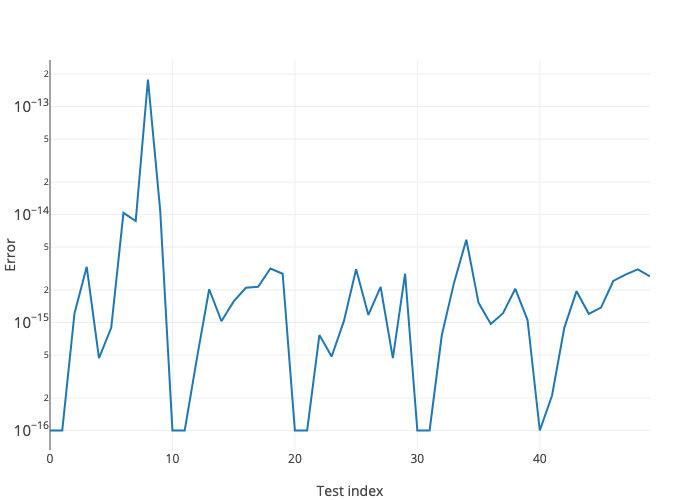

In [14]:
# Plot error at each step of the test suite
using PlotlyJS
plot([scatter(y=err.+1e-16,name="Error")],
     Layout(yaxis_type="log",yaxis_exponentformat="power",xaxis_title="Test index", yaxis_title="Error")
    )